<h1> Data Wrangling 2</h1>
 



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#import seaborn as sns
from pandas.io.json import json_normalize
import re as re
import datetime as dt
from dateutil.parser import parse # for date format check
from sklearn.linear_model import LinearRegression # for price prediction
from sklearn.cross_validation import train_test_split # for splitting the data
% matplotlib inline
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import collections
from sklearn import preprocessing
import math

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3 style="color:red">Task 1 Started </h3>

<p style="color:green;font-weight: bold;font-style: italic;">The Task 1 is about Integration between S1 and S2: 
S1 is the file named "data_s1.csv" which contains 4,600 records <br>
S2 is the file named "data_s2.xml" which contains 430 records 
<br>
The final outputed data will have the following attributes and appropriate datatypes. 
</p>
<table style="width:100%; border: 1px solid black;">
<tr>
<th>Attribute</th>
<th>Description</th>
</tr>
<!-- Date-->
<tr>
<td>Date</td>
<td>Date of the property sold, e.g., 20140502</td>
</tr>
<!-- Price-->
<tr>
<td>price</td>
<td>Property sold price</td>
</tr>
<!-- BedRooms-->
<tr>
<td>bedrooms</td>
<td>Number of bedrooms</td>
</tr>
<!-- BathRooms-->
<tr>
<td>bathrooms</td>
<td>Number of bathrooms, the value of which can be either an integer or a fraction ending with .25, .5, and .75. For example, 0.5 accounts for a room with a toilet but no shower </td>
</tr>
<!-- Square Feet Living Area-->
<tr>
<td>sqft_living</td>
<td>Square footage of the property's interior living space, it is equal to the sum of basement area (i.e., sqft_basement) and the above living area (i.e., sqft_above) </td>
</tr>
<!-- Square Feet Lot Area-->
<tr>
<td>sqft_lot</td>
<td>Square footage of the land space</td>
</tr>
<!-- Floors-->
<tr>
<td>floors</td>
<td>Number of floors</td>
</tr>
<!-- Water Front-->
<tr>
<td>waterfront</td>
<td>Whether the property was overlooking the waterfront or not</td>
</tr>
<!-- View-->
<tr>
<td>view</td>
<td>An index from 0 to 4 of how good the view of the property was</td>
</tr>
<!-- Condition-->
<tr>
<td>condition</td>
<td>An index from 1 to 5 on the condition of the property.</td>
</tr>
<!-- Square Feet  Above-->
<tr>
<td>sqft_above</td>
<td>The square footage of the interior living space that is above ground level </td>
</tr>
<!-- Square Feet Basement-->
<tr>
<td>sqft_basement</td>
<td>The square footage of the interior living space that is below ground level </td>
</tr>
<!-- Year Built-->
<tr>
<td>yr_built</td>
<td>The year the property was initially built </td>
</tr>
<!-- Year Renovated-->
<tr>
<td>yr_renovated</td>
<td>The year of the property's last renovation</td>
</tr>
<!-- Street-->
<tr>
<td>street</td>
<td>The street address of the property, e.g., “3140 Franklin Ave E”</td>
</tr>
<!-- City-->
<tr>
<td>city</td>
<td>The city where the property is, e.g., “Seattle”</td>
</tr>
<!-- State and Zip Code-->
<tr>
<td>statezip</td>
<td>The zip code area where the property is, which contains state and zip code, separated by a space. For example, “WA 98115”, where WA is the abbreviation of Washington and the number is the zip code.</td>
</tr>
<!-- Country-->
<tr>
<td>country</td>
<td>The country where the property is, e.g., “USA”</td>
</tr>
</table>
<p style="color:red;font-style: italic;">
 date              datetime-object
 <br>
price            int64
<br>
bedrooms           int64
<br>
bathrooms        float64
<br>
sqft_living        int64
<br>
sqft_lot           int64
<br>
floors           float64
<br>
waterfront         int64
<br>
view               int64
<br>
condition          int64
<br>
sqft_above         int64
<br>
sqft_basement      int64
<br>
yr_built           int64
<br>
yr_renovated       int64
<br>
street            object
<br>
city              object
<br>
statezip          object
<br>
country           object
<br>
</p>

<h3>Step 1 is to load both the csv and the xml files as a pandas dataframe</h3>

In [2]:

# Opening data_s1.csv file and Converting it into pandas Dataframe
data_frame1=pd.DataFrame.from_csv('data_s1.csv')
print (data_frame1.isnull().any())
# Only yr_renovated has Nan Vales
# We will deal with this later on

# Opening data_s2.xml file using Btree
btree = BeautifulSoup(open("data_s2.xml"),"lxml-xml") 
records = btree.find_all("record") # Storing all the records in records result set
# Here as I belive price is the target values (y) and the rest of the records are predictor values (x)
# I will append price as the last coloumn in both data frames 

# Among the records creating a list for all the rows tagged date 
date = [record.string for record in btree.find_all("date")]

# Among the records creating a list for all the rows tagged address
address = [record.string for record in btree.find_all("address")]

# Among the records creating a list for all the rows tagged soldDate 
sold_dates = [record.string for record in btree.find_all("soldDate")]

# Among the records creating a list for all the rows tagged Bedrooms 
bedrooms = [record.string for record in btree.find_all("bedrooms")]

# Among the records creating a list for all the rows tagged bathrooms 
bathrooms = [record.string for record in btree.find_all("bathrooms")]

# Among the records creating a list for all the rows tagged livingArea 
living_area_sqm = [record.string for record in btree.find_all("livingArea")]

# Among the records creating a list for all the rows tagged lotArea 
lot_area_sqm = [record.string for record in btree.find_all("lotArea")]

# Among the records creating a list for all the rows tagged floors 
floors = [record.string for record in btree.find_all("floors")]

# Among the records creating a list for all the rows tagged waterfront 
waterfront = [record.string for record in btree.find_all("waterfront")]

# Among the records creating a list for all the rows tagged view 
view = [record.string for record in btree.find_all("view")]

# Among the records creating a list for all the rows tagged upperArea 
upper_area = [record.string for record in btree.find_all("upperArea")]

# Among the records creating a list for all the rows tagged basementArea 
basement_area = [record.string for record in btree.find_all("basementArea")]

# Among the records creating a list for all the rows tagged buildYear 
build_yr = [record.string for record in btree.find_all("buildYear")]

# Among the records creating a list for all the rows tagged renovateYear 
renovated_yr = [record.string for record in btree.find_all("renovateYear")]

# Among the records creating a list for all the rows tagged price 
price = [record.string for record in btree.find_all("price")]




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
street           False
city             False
statezip         False
country          False
dtype: bool


In [3]:

# Creating a datadictonary for all the values of the xml file
dataDict = {}
dataDict['date'] = date
dataDict['address'] = address
dataDict['sold_Date'] = sold_dates
dataDict['bedrooms'] = bedrooms
dataDict['bathrooms'] = bathrooms
dataDict['sqft_living_sqm'] = living_area_sqm
dataDict['sqft_lot_sqm']=lot_area_sqm
dataDict['floors']=floors
dataDict['waterfront']=waterfront
dataDict['view']=view
dataDict['sqft_above']=upper_area
dataDict['sqft_basement']=basement_area
dataDict['yr_built']=build_yr
dataDict['yr_renovated']=renovated_yr

dataDict['price'] = price
# Creating a dataframe2 with the data dictionary
data_frame2 = pd.DataFrame(dataDict,index=date)
# I belive for now atleast the index is the data for this dataframe 
data_frame2.index.name = 'date'

print (data_frame2.isnull().any())
# sqft_basement view and waterfront has Nan Values
# We will deal with them later on


date               False
address            False
sold_Date          False
bedrooms           False
bathrooms          False
sqft_living_sqm    False
sqft_lot_sqm       False
floors             False
waterfront          True
view                True
sqft_above         False
sqft_basement       True
yr_built           False
yr_renovated       False
price              False
dtype: bool


In [4]:
# Now checking wheather the dataframe for the xml file looks the same as the xml file 
data_frame2.head()
# Right now each datatype is object. 
# This will be changed slowly as we begin intergrating the datasets 
print (data_frame1.dtypes)
print (data_frame2.dtypes)

price             object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object
date               object
address            object
sold_Date          object
bedrooms           object
bathrooms          object
sqft_living_sqm    object
sqft_lot_sqm       object
floors             object
waterfront         object
view               object
sqft_above         object
sqft_basement      object
yr_built           object
yr_renovated       object
price              object
dtype: object


<h3>Step 2 is to examine both the data types side by side.</h3>
<h4 style="color:red">Started examine "date" column in both the dataframes </h4>


In [5]:
# For data_frame2 the index is the date as well
# To check if each date is a valid date and it is in the date format
# I have used parse for this purpose
# parse will throw an error if anything is wrong with the dates
# as it will return the date in datetime format
# Checking in the first dataframe 
data_frame1['date']=data_frame1.index
data_frame1.reset_index(drop=True,inplace=True)
# then checking the type of the date
print (data_frame1.date.dtype)
# As it is already in datetime64 we dont need to correct it or modify it 


# Checking for the second dataframe 
# In the xml file there are two dates 
# one is named "date"
# second one is named "soldDate"
print (data_frame2.columns)
# However there is only one date in the csv file. 
# As we know both files is for the housing data for the King County in Washington D.C USA
# I belive soldDate needs to be used. 
date2_list=[]
updated_date_list=[]
date2_list=data_frame2.sold_Date.tolist() # converting series into a list
for date in date2_list:
    updated_date_list.append(parse(date) ) # Checking for anomalies if not append it to the updated_print_list
# Dropping the date from the dataframe 
# and renaming sold_date as the date
data_frame2.drop('date',inplace=True,axis=1) # Dropping date Column from dataframe 2 
data_frame2['date']=updated_date_list
data_frame2.drop('sold_Date',inplace=True,axis=1) # Dropping sold_date Column as well from dataframe 2 
data_frame2.index=np.arange(4600, len(data_frame1) + 430) 
# The first dataframe is indexed from 0 to 4599
# The second dataframe now indexed from 4600 to 5029

datetime64[ns]
Index(['date', 'address', 'sold_Date', 'bedrooms', 'bathrooms',
       'sqft_living_sqm', 'sqft_lot_sqm', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price'],
      dtype='object')


<h4 style="color:green">Finished examining "date" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "price" column in both the dataframes </h4>

In [6]:
# Checking in the first dataframe 
data_frame1.head()
#print (data_frame1.price.dtype) # The price should be price float rather than object 
# By inspecting I have seen that it is in numbers because it is 313k and 2.384m rather than 313000 and 2384000 
# Converting price to Int64 
# Creating a price_list1 which will store the prices from dataframe 1 
price_list1=data_frame1.price.tolist() # Converitng to a list
updated_price_list1=[]
# For each price
for i in range(0,len(price_list1)):
    if (price_list1[i][-1:]=='k'): # If its k
        #print (float(price_list1[i][:-1])*1000)
        updated_price_list1.append(round (round(float(price_list1[i][:-1])*1000))) # Multiply by 1000 
        #print ("thousands")
    elif (price_list1[i][-1:]=='m'):
        updated_price_list1.append(round(round(float(price_list1[i][:-1])*1000000,-1))) # Multiple by 1000000
        #print (float(price_list1[i][:-1])*1000000)
        #print ('millions')
    else:
        print (price_list1[i])
        print ("Error")
        # No Errors Found


# Updating the old price series from the dataframe 
data_frame1['price']=updated_price_list1# Dropping date Column from dataframe 2 
#data_frame1.drop('updated_price',axis=1,inplace=True)
#print (data_frame1.price.dtype)

# Checking in the second dataframe 
print (data_frame2.price.dtype)
# In this data frame price is object but upon inspection it is a number 
# So we just convert all the prices to the int datatype
data_frame2['price']=pd.to_numeric(data_frame2.price).astype(int)
print (data_frame2.price.dtype)

# Checking for missing prices
print (len(data_frame1[data_frame1.price==0])) # No missing prices found
print (len(data_frame2[data_frame2.price==0]))# No missing prices found

object
int64
0
0


<h4 style="color:green" >Finished examining "price" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "bedroom" column in both the dataframes </h4>

In [7]:
# Checking the first Dataframe
#print (data_frame1.bedrooms.dtype)
print (data_frame1[data_frame1.bedrooms <=0]) # 2 records which has equal or less than 0 rooms
# It is an integer 64 value 


# Checking the second Dataframe
#print (data_frame2.bedrooms.dtype)
# It is an object type but upon inspection it is a number
# Converting it to int type
data_frame2['bedrooms']=pd.to_numeric(data_frame2.bedrooms).astype(int)
#print (data_frame2.bedrooms)
print (data_frame2[data_frame2.bedrooms <=0])   # 0 records which has equal or less than 0 rooms

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
2523  1095000         0        0.0         3064      4764     3.5           0   
3419  1295650         0        0.0         4810     28008     2.0           0   

      view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
2523     2          3        3064              0      1990           NaN   
3419     0          3        4810              0      1990           NaN   

                street     city  statezip country       date  
2523     814 E Howe St  Seattle  WA 98102     USA 2014-06-12  
3419  20418 NE 64th Pl  Redmond  WA 98053     USA 2014-06-24  
Empty DataFrame
Columns: [address, bedrooms, bathrooms, sqft_living_sqm, sqft_lot_sqm, floors, waterfront, view, sqft_above, sqft_basement, yr_built, yr_renovated, price, date]
Index: []


<h4 style="color:green">Finished examining "bedroom" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "bathroom" column in both the dataframes </h4>

In [8]:
# Checking the first Dataframe
print (data_frame1.bathrooms.dtype)
# Checking for bathrooms value  < 0.25 as 0.25 is the minimum possible value 
print (data_frame1[data_frame1.bathrooms <0.25])
# It is an flaot 64 value 


# Checking the second Dataframe
print (data_frame2.bathrooms.dtype)
# It is an object type but upon inspection it is a number
# Converting it to float type
data_frame2['bathrooms']=pd.to_numeric(data_frame2.bathrooms).astype(float)
# Now its float 64 which is correct

#print (data_frame2.bathrooms)
print (data_frame2[data_frame2.bathrooms <=0])   # 0 records which has equal or less than 0 rooms

float64
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
2523  1095000         0        0.0         3064      4764     3.5           0   
3419  1295650         0        0.0         4810     28008     2.0           0   

      view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
2523     2          3        3064              0      1990           NaN   
3419     0          3        4810              0      1990           NaN   

                street     city  statezip country       date  
2523     814 E Howe St  Seattle  WA 98102     USA 2014-06-12  
3419  20418 NE 64th Pl  Redmond  WA 98053     USA 2014-06-24  
object
Empty DataFrame
Columns: [address, bedrooms, bathrooms, sqft_living_sqm, sqft_lot_sqm, floors, waterfront, view, sqft_above, sqft_basement, yr_built, yr_renovated, price, date]
Index: []


<h4 style="color:green">Finished examining "bathroom" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "sqft_living" column in both the dataframes </h4>

In [9]:
# Checking in dataframe 1
print (data_frame1.sqft_living.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2 
# First thing to notice is the Living Area is given in Square Meters 
# and we have to convert it to Square Feet 
# Seocond is the data type which is currently object 
# and it should be int64 as well

# Converting Living Area from Square Meters to Squareft
#print (data_frame2.sqft_living_sqm)
new_sqft_living=[] # Creating a new list to store 
data_frame2['sqft_living_sqm']=pd.to_numeric(data_frame2.sqft_living_sqm).astype(float) # Convertin to float 
old_sqft_living=data_frame2.sqft_living_sqm.tolist()

for value in old_sqft_living: # For each value 
    new_sqft_living.append( (round(round(value,7)*10.7639)) ) # Conversion b/w sqm and sqft 
data_frame2['sqft_living_sqm']=new_sqft_living # Updating Dataframe
data_frame2.rename(columns={ "sqft_living_sqm": "sqft_living"},inplace=True) # renaming column
print (data_frame2.sqft_living.dtype)
# Now its int 64 which is correct

int64
int64


<h4 style="color:green">Finished examining "sqft_living" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "sqft_lot" column in both the dataframes </h4>

In [10]:
# Checking in dataframe 1
print (data_frame1.sqft_lot.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2 
# First thing to notice is the Lot Area is given in Square Meters 
# and we have to convert it to Square Feet 
# Seocond is the data type which is currently object 
# and it should be int64 as well
new_sqft_lot=[] # Creating a new list to store 
data_frame2['sqft_lot_sqm']=pd.to_numeric(data_frame2.sqft_lot_sqm).astype(float) # Convertin to float 
old_sqft_lot=data_frame2.sqft_lot_sqm.tolist()

for value in old_sqft_lot: # For each value 
    new_sqft_lot.append( (round(round(value,7)*10.7639)) ) # Conversion b/w sqm and sqft 
data_frame2['sqft_lot_sqm']=new_sqft_lot # Updating Dataframe
data_frame2.rename(columns={ "sqft_lot_sqm": "sqft_lot"},inplace=True) # renaming column
print (data_frame2.sqft_lot.dtype)
# Now its int 64 which is correct

int64
int64


<h4 style="color:green">Finished examining "sqft_lot" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "floors" column in both the dataframes </h4>

In [11]:
# Checking in dataframe 1
print (data_frame1.floors.dtype)
# it is the correct data type (float64)

# Checking in dataframe 2 
# It is in object datatype
# converting it to float64
print (data_frame2.floors.dtype)
data_frame2['floors']=pd.to_numeric(data_frame2.floors).astype(float) # Convertin to float 
print (data_frame2.floors.dtype) # Now it is in float
# Now its float 64 which is correct

float64
object
float64


<h4 style="color:green">Finished examining "floors" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "waterfront" column in both the dataframes </h4>

In [12]:
# Checking in dataframe 1
print (data_frame1.waterfront.dtype)
# it is the correct data type (int64)
# its 0 if it is not a waterfront property
# its 1 if it is  a waterfront property

# Checking in dataframe 2 
print (data_frame2.waterfront.dtype)
# Converting object to int64
new_waterfront=[] # For storing new waterfront values
old_waterfront=data_frame2.waterfront.tolist()
for value in old_waterfront:
    if (value==None): # It means it's 0
        new_waterfront.append(0)
    elif (value=="Yes"): # 
        new_waterfront.append(1)
data_frame2['waterfront']=new_waterfront # Updating Series
print (data_frame2.waterfront.dtype) # Checking Type
# Now its int 64 which is correct

int64
object
int64


<h4 style="color:green">Finished examining "waterfront" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "view" column in both the dataframes </h4>

In [13]:
# Checking in dataframe 1
print (data_frame1.view.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2 
print (data_frame2.view.dtype)
# Converting object to int64
new_view=[]# For storing new view values
old_view=data_frame2.view.tolist()
for value in old_view:
    if (value==None): # It means it's 0
        new_view.append(0)
    elif (value=="1"): #  It means it's a 1
        new_view.append(1)
    elif (value=="2"): #  It means it's a 2
        new_view.append(2)
    elif (value=="3"): #  It means it's a 3
        new_view.append(3)
    elif (value=="4"): #  It means it's a 4
        new_view.append(4)
data_frame2['view']=new_view # Updating Series
print (data_frame2.view.dtype) # Checking Type
# Now its int 64 which is correct

int64
object
int64


<h4 style="color:green">Finished examining "view" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "condition" column in both the dataframes </h4>

In [14]:
# Checking in dataframe 1
print (data_frame1.condition.dtype)
# it is the correct data type (int64)
print (data_frame1.head())
print ("The mean of the condition is"+str(round(data_frame1.condition.mean())))
# Checking in dataframe 2
# There is no Conditon given for this data
# So we have to impute these values
# For now I am imputing these values as the mean of the 
# condition in S1

print (data_frame1.condition.describe())
data_frame2['condition']=3

int64
     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000         3       1.50         1340      7912     1.5           0   
1  2384000         5       2.50         3650      9050     2.0           0   
2   342000         3       2.00         1930     11947     1.0           0   
3   420000         3       2.25         2000      8030     1.0           0   
4   550000         4       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955           NaN   
1     4          5        3370            280      1921           NaN   
2     0          4        1930              0      1966           NaN   
3     0          4        1000           1000      1963           NaN   
4     0          4        1140            800      1976           NaN   

                     street       city  statezip country       date  
0      18810 Den

<h4 style="color:green">Finished examining "condition" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "sqft_above" column in both the dataframes </h4>

In [15]:
# Checking in dataframe 1
print (data_frame1.sqft_above.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2 
print (data_frame2.sqft_above.dtype)
# First thing to notice is the sqft_above Area is given in Square Meters 
# and we have to convert it to Square Feet 
# Seocond is the data type which is currently object 
# and it should be int64 as well
new_sqft_above=[] # Creating a new list to store 
data_frame2['sqft_above']=pd.to_numeric(data_frame2.sqft_above).astype(float) # Converting to float 
old_sqft_above=data_frame2.sqft_above.tolist()

for value in old_sqft_above: # For each value 
    new_sqft_above.append( (round(round(value,7)*10.7639)) ) # Conversion b/w sqm and sqft 
data_frame2['sqft_above']=new_sqft_above # Updating Dataframe
print (data_frame2.sqft_lot.dtype)
# Now its int 64 which is correct

int64
object
int64


<h4 style="color:green">Finished examining "sqft_above" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "sqft_basement" column in both the dataframes </h4>

In [16]:
# Checking in dataframe 1
print (data_frame1.sqft_basement.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2 
# First thing to notice is the sqft_basement Area is given in Square Meters 
# and we have to convert it to Square Feet 
# Seocond is the data type which is currently object 
# and it should be int64 as well
new_sqft_basement=[] # Creating a new list to store 
data_frame2['sqft_basement']=pd.to_numeric(data_frame2.sqft_basement).astype(float) # Converting to float 
old_sqft_basement=data_frame2.sqft_basement.tolist()

for value in old_sqft_basement: # For each value 
    if value >0:
        new_sqft_basement.append( (round(round(value,7)*10.7639)) )
    else:
        new_sqft_basement.append(0)
print (len(new_sqft_basement))
data_frame2['sqft_basement']=new_sqft_basement # Updating Dataframe
print (data_frame2.sqft_basement.dtype)

int64
430
int64


<h4 style="color:green">Finished examining "sqft_basement" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "yr_built" column in both the dataframes </h4>

In [17]:
# Checking in dataframe 1
print (data_frame1.yr_built.dtype)
# it is the correct data type (int64)

# Checking in dataframe 2
print (data_frame2.yr_built.dtype) # Object DataType
# converting it to int64
data_frame2['yr_built']=pd.to_numeric(data_frame2.yr_built).astype(int) # Convertin to float 
print (data_frame2.yr_built.dtype) # Now it is in float
# Now its float 64 which is correct

int64
object
int64


<h4 style="color:green">Finished examining "yr_built" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "yr_renovated" column in both the dataframes </h4>

In [18]:
# Checking in dataframe 1
print (data_frame1.yr_renovated.dtype)
data_frame1.yr_renovated.fillna('0',inplace=True) # Updating Nan values to 0 
data_frame1['yr_renovated']=pd.to_numeric(data_frame1.yr_renovated).astype(int) # Convertin to int 
print (data_frame1.yr_renovated.dtype)
# it is the incorrect data type (float64)

# These values should be replaced by 0 
# Checking in dataframe 2
print (data_frame2.yr_renovated.dtype) # Object DataType
data_frame2['yr_renovated']=pd.to_numeric(data_frame2.yr_renovated).astype(int) # Convertin to int 
print (data_frame2.yr_renovated.dtype) # Object DataType

float64
int64
object
int64


<h4 style="color:green">Finished examining "yr_renovated" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "street" column in both the dataframes </h4>

In [19]:
# Checking in dataframe 1
#print (data_frame1.street)
# The issue with data integration is that it might create duplicate records
# Although it is the correct data type (object) address is not divided into house # and Street Address
# and it would very difficult to find duplicates 
# so we will have to stick with the current address format of S1 
print (data_frame1.street.dtype)
# Correct DataType

# Checking in dataframe 2
# There is no street column so we will have to create our own
# the street address is the first and the second item or address 
street_add=[]
abbrev=""
old_street_add=data_frame2.address.tolist()
for address in old_street_add:
    address_list=address.split(", ")
    street_add.append(address_list[0]+" "+address_list[1]) # Appending first two part as the street address
data_frame2['street']=street_add
print (data_frame2.head())

object
                                                address  bedrooms  bathrooms  \
4600  10515, 115th Place Northeast, Juanita, Kirklan...         3       1.75   
4601  1501, Northwest 90th Street, Ballard, Seattle,...         3       3.25   
4602  537, North 70th Street, Phinney Ridge, Seattle...         3       2.00   
4603  12008, 35th Avenue Northeast, Cedar Park, Lake...         3       1.00   
4604  11807, Northeast 105th Court, Juanita, Kirklan...         3       2.50   

      sqft_living  sqft_lot  floors  waterfront  view  sqft_above  \
4600         1710      8767     1.0           0     0        1710   
4601         1830      1804     3.0           0     0        1830   
4602         1780      5720     1.0           0     0         980   
4603         1370      6780     2.0           0     0        1370   
4604         1530      2913     2.0           0     0        1530   

      sqft_basement  yr_built  yr_renovated   price       date  condition  \
4600              0 

<h4 style="color:green">Finished examining "street" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "city" column in both the dataframes </h4>

In [20]:
# Checking in dataframe 1
#print (data_frame1.city.dtype) # Correct
cities=set(data_frame1.city)
#print (cities) #There are going to be some unique cities as well 


# Checking in dataframe 2
# there is no cities column in dataframe 2 
# so we create it 
# Ususally cities are in the 2nd or the 3rd part of the address
# below are the cities which has been identified as a part of dataframe 2 
# appending each to the main cities list
cities.add('Union Hill-Novelty Hill')
cities.add('Stuart')
cities.add('Hobart')
cities.add('White Center')
cities.add('Maple Heights-Lake Desire')
cities.add('Klahanie')
cities.add('Issaquah')
cities.add('East Renton Highlands')
cities.add('Lakeland North')
cities.add('Lakeland South')
cities.add('Ames Lake')
cities.add('East Hill-Meridian')
cities.add('Krain')
cities.add('Lake Morton-Berrydale')
cities.add('Cedar Falls')
cities.add('Cedar Grove')
cities.add('Bryn Mawr-Skyway')
cities.add('Georgetown')
cities.add('Tanner')
cities.add('Cottage Lake')
cities.add('Oskams Corner')
cities.add('Fairwood')
cities.add('Snoqualmie Falls')
cities.add('Mirrormont')
cities.add('Lea Hill')

old_cities=data_frame2.address.tolist()
new_cities=[]
for address in old_cities:
    address_list=address.split(", ") # Splitting the address
    for part in address_list: # Searching for all the parts of the address to find the City Name
        if part in cities: # If it is a city name
            new_cities.append(part) # Append the matching city name with the record
            #print ("\t\t")
    #print (address)
data_frame2['city']=new_cities #New column added to second dataframe


<h4 style="color:green">Finished examining "city" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "statezip" column in both the dataframes </h4>

In [21]:
# Checking in dataframe 1
print (data_frame1.statezip.dtype) # Correct
#print (set(data_frame1.statezip)) #There are going to be some unique zipcodes as well 
#print (len(set(data_frame1.statezip))) # A total of 77 Zip Different

# Checking in datafrae 2
data_frame2.head()
# there is no statezip column in dataframe 2 
# so we create it 
old_address=data_frame2.address.tolist()
zip_codes=[]
i=0
for address in old_address:
    i=i+1
    address_list=address.split(', ')
    if (len(address_list[-2]))>5:
        zip_codes.append(0)
    else:
        zip_codes.append(int(address_list[-2]))
#data_frame2.head(90)
# Four Issues Identified 

# First in the 4677 78th index 
#print (data_frame2[data_frame2.index ==4677])
# Zip code is 98006

# Second in the 4689 90th index
#print (data_frame2[data_frame2.index ==4689])
# Zip code is 98038

# Third in the 4734th index
#print (data_frame2[data_frame2.index ==4734])
# Zip code is 98006

# Fourth in the 4896th index 
#print (data_frame2[data_frame2.index ==4896])
# Zip code is 98011

#print (zip_codes)
# Updating Zip Codes 
zip_codes[77]=98006
zip_codes[89]=98038
zip_codes[134]=98006
zip_codes[296]=98011

# Zip Codes have been found
# Now adding state to make it statezip
# As every property address is in "Washington" WA  is concatenated before the zipcodes
state_zip=[]
for zip_code in zip_codes:
    state_zip.append("WA"+" "+str(zip_code)) # Combining WA with zip codes
    
data_frame2['statezip']=state_zip # Adding statezip to the dataframe

object


<h4 style="color:green">Finished examining "statezip" column in both the dataframes </h4>

<h4 style="color:red">Starting examining "country" column in both the dataframes </h4>

In [22]:
# As the Only Country is USA 
# Checking in dataframe 1
print (data_frame1.country.dtype) # Correct
# The only value is USA

# Checking in dataframe 2 
# There is no country column in dataframe 2 
# So I have to create it
data_frame2['country']='USA'
data_frame2.head()

object


,address,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,price,date,condition,street,city,statezip,country
4600,"10515, 115th Place Northeast, Juanita, Kirklan...",3,1.75,1710,8767,1.0,0,0,1710,0,1986,0,630000,2014-07-09,3,10515 115th Place Northeast,Kirkland,WA 98033,USA
4601,"1501, Northwest 90th Street, Ballard, Seattle,...",3,3.25,1830,1804,3.0,0,0,1830,0,2014,0,599950,2014-07-09,3,1501 Northwest 90th Street,Seattle,WA 98117,USA
4602,"537, North 70th Street, Phinney Ridge, Seattle...",3,2.00,1780,5720,1.0,0,0,980,800,1925,0,680000,2014-07-09,3,537 North 70th Street,Seattle,WA 98103,USA
4603,"12008, 35th Avenue Northeast, Cedar Park, Lake...",3,1.00,1370,6780,2.0,0,0,1370,0,1930,0,335500,2014-07-09,3,12008 35th Avenue Northeast,Seattle,WA 98125,USA
4604,"11807, Northeast 105th Court, Juanita, Kirklan...",3,2.50,1530,2913,2.0,0,0,1530,0,1986,0,379000,2014-07-09,3,11807 Northeast 105th Court,Kirkland,WA 98033,USA


<h4 style="color:green">Finished examining "country" column in both the dataframes </h4>

<h1>Merging Data</h1>
<h3>Now concatenating the dataframes and removing the duplicates</h3>

In [23]:
# Checking the no of columns in dataframe 1
data_frame1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'date'],
      dtype='object')

In [24]:
# Checking the no of columns in dataframe 2
data_frame2.drop('address',axis=1,inplace=True)
data_frame2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'price', 'date', 'condition', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [25]:
# Merging 
final_dataframe = pd.concat([data_frame1, data_frame2])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [26]:
# Sorting the columns
final_dataframe = final_dataframe[['date', 'price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront'
                       ,'view','condition','sqft_above','sqft_basement','yr_built','yr_renovated',
                      'street','city','statezip','country']]
print (final_dataframe.shape)

(5030, 18)


In [27]:
# Searching for Duplicates

duplicated_rows=final_dataframe[final_dataframe.duplicated(['statezip','yr_built','price','sqft_living','sqft_lot'], keep='first')
               ].groupby(('statezip', 'yr_built','price','sqft_living','sqft_lot')).all()
print (len(duplicated_rows))

# Removing Duplicates 
final_dataframe=final_dataframe.drop_duplicates(['statezip','yr_built','price','sqft_living','sqft_lot'], keep='last')
print (final_dataframe.shape)
# Removing 30 Duplicate Records

30
(5000, 18)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  after removing the cwd from sys.path.


In [28]:

combined_dataframe=final_dataframe
combined_dataframe.to_csv('integrated.csv',index=False)

<h3 style="color:red">Task 1 Ended </h3>

<h1>Part B -Data Normalization</h1>


In [31]:
# Loading the combined csv file 
# Opening file and Converting it into pandas Dataframe
data_frame_b=pd.DataFrame.from_csv('integrated.csv')
data_frame_b['date']=data_frame_b.index

data_frame_b.reset_index(drop=True,inplace=True)
data_frame_b.dtypes
data_frame_b.shape
data_frame_b.head()
# Sorting the columns
data_frame_b = data_frame_b[['date', 'price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront'
                       ,'view','condition','sqft_above','sqft_basement','yr_built','yr_renovated',
                      'street','city','statezip','country']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


<h3>Applying z-score normalization</h3>

In [32]:
std_scale = preprocessing.StandardScaler().fit(data_frame_b[['price']])
df_std = std_scale.transform(data_frame_b[['price']]) # an array not a df
df_std[0:5]
data_frame_b['Price_Scaled'] = df_std[:,0] #  Price scaled Column

The Mean of Price is Now: 0
The Standard Deviation of Price is now : 1


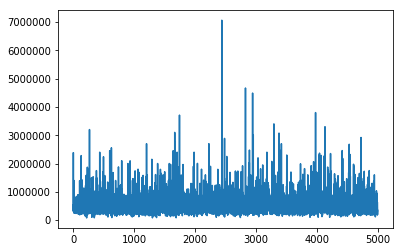

In [33]:
data_frame_b.head()
print ("The Mean of Price is Now: "+str(round(data_frame_b.Price_Scaled.mean()))) 
# checking that μ = 0 
print ("The Standard Deviation of Price is now : "+str(round(data_frame_b.Price_Scaled.std())))
# checking σ = 1

# Plotting the price 
data_frame_b["price"].plot()

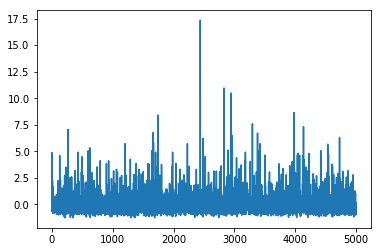

In [34]:
data_frame_b['Price_Scaled'].plot()

<h3>You can see from above graphs that both original and standardized data are in the same shape but shifted.</h3>

<h1> Applying MinMax Normalization</h1>

In [35]:
minmax_scale = preprocessing.MinMaxScaler().fit(data_frame_b[['price']])
df_minmax = minmax_scale.transform(data_frame_b[['price']])
df_minmax[0:5]

array([[0.03364593],
       [0.33015964],
       [0.03779798],
       [0.04896557],
       [0.06757821]])

In [36]:
minA = data_frame_b.price.min() # Finding the Minima
maxA = data_frame_b.price.max() # Finding the Maxima

print ("The Minimum price value is "+str(minA))
print ("The Maximum price value is "+str(maxA))

The Minimum price value is 78000
The Maximum price value is 7062500


In [37]:
print ("The Minimum price value after Min/Max Normalization is "+str(df_minmax.min()))
print ("The Maximum price value after Min/Max Normalization is "+str(df_minmax.max()))



The Minimum price value after Min/Max Normalization is 0.0
The Maximum price value after Min/Max Normalization is 1.0


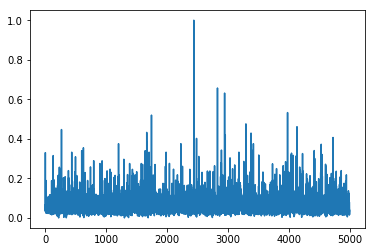

In [38]:
#plotting Min Max normalization 
plt.plot(df_minmax)

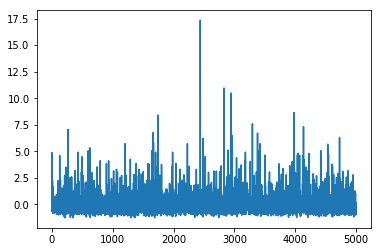

In [39]:
# Plotting scaled price
data_frame_b['Price_Scaled'].plot()

<h3>You can see from above graph that both Z-Score and Min-Max Normalization do not affect the shape
<br>
But they affect the range of price
</h3>

<h3>Applying Log Transformation</h3>

In [40]:
data_frame_b['log_price'] = None # Creating a column to store the log_prices
i = 0 #Index
for row in data_frame_b.iterrows():
    data_frame_b['log_price'].at[i] = math.log(data_frame_b["price"][i]) # Taking log of the current price
    i += 1 #incrementing index

In [ ]:
plt.hist(data_frame_b.log_price,bins=60)
# Shows a positively skewed normal distribution

In [ ]:
print ("The Mean Log Price is "+str(round(data_frame_b.log_price.mean(),2)))
print ("The Median Log Price is "+str(round(data_frame_b.log_price.median(),2)))
print ("The Mode Log Price is "+str(data_frame_b.log_price.mode()))

<h3>Final Result</h3>

<h3>Log Transformation</h3>
<h4 style="color:green">The above distribution looks like a very slightly Positive/Right Skewed Distribution As the Mean is very slightly greater than the Median and the mode is before the mean<br>
So, the best transformation for this data is log transformation. As the data is positively skewed. we will need to compress large values. That means we need to move down the ladder of powers to spread out data that is clustered at lower values.
</h4>

<h3 style="color:red">Task 2 Ended </h3>